<a href="https://colab.research.google.com/github/fabrytp8/AG1/blob/main/regresion/Programa12_Regresion_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Carga de datos.
datos = datasets.load_boston()
# print(datos)
X = datos.data
y = datos.target
print('Dimensiones de X: ', np.shape(X))
# print(y)

In [4]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'MSE': 'neg_mean_squared_error',
  'RMSE': 'neg_root_mean_squared_error',
  'R2':   'r2'
}

In [5]:
# Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

(404, 13)


In [6]:
# Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)

In [7]:
# Construcción del algoritmo de aprendizaje.
reg = linear_model.LinearRegression()

In [8]:
# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_validate(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
#print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))
# pprint(cross_val_results)

In [9]:
# Entrenamiento con todos los datos para obtener los coeficientes del modelo.
model = reg.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]

Término independiente:  22.796534653465375


In [ ]:
# ---- PREDICCIÓN ---- #

In [10]:
# Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [11]:
# Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)
# print(y_pred_test)

In [12]:
# Cálculo de las métricas de evaluación.
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MAE:  %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

MAE:  3.1891
MAE:  24.2911
RMSE: 4.9286
R2:   0.6688


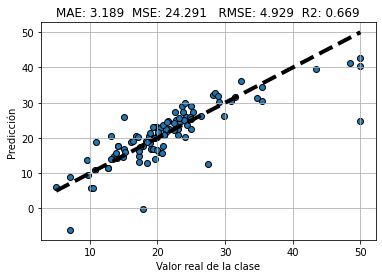

In [13]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
ax.scatter(y_testing, y_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  MSE: %.3f   RMSE: %.3f  R2: %.3f" %
          (MAE, MSE, RMSE, R2))
plt.grid()
plt.show()